In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore") # this is to ignore the warnings that are generated by the code

In [91]:
data = pd.read_csv("marketing_data.csv")

In [92]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [94]:
data.isnull().sum()  # 24 null values in income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [95]:
data.columns = data.columns.str.replace(" ","").str.lower() # Cleaning column names

In [96]:
data.income = data.income.str.replace('[$,]','', regex = True).astype(float) # Changing income to float datatype

In [97]:
data ['dt_customer'] = pd.to_datetime(data['dt_customer'] , format='%m/%d/%y') # Changing dt_customer to datetime datatype

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

In [99]:
data.marital_status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [100]:
# reducing multiple marital_status values to two categories 
def change(x):
    if x in ('Married', 'Together'):
        return 'couple'
    else:
        return 'alone'

data['marital_status'] = data['marital_status'].apply(change)

In [101]:
agg_data = data.groupby(['education','marital_status'])[['income']].mean().unstack()['income'] 
# Calculate mean income for marital_status and education combinations
agg_data

marital_status,alone,couple
education,,
2n Cycle,51957.984375,45597.992647
Basic,17998.350000,21663.852941
Graduation,52615.569652,52779.380952
Master,53170.472000,52785.795833
PhD,54050.657143,57343.238562


In [102]:
for edu in data.education.unique():
    for status in data.marital_status.unique():
        val = agg_data.loc[edu, status]
        data.loc[(data.education == edu) & (data.marital_status == status) & ( data.income.isnull()), 'income'] = val
        # assigning mean income to null income values

In [103]:
data.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
response               0
complain               0
country                0
dtype: int64

In [104]:
# creating new variables
data['age'] = (2025 - data.year_birth)
data['spending'] = data.loc [:, data.columns.str.startswith('mnt')].sum(axis = 1) 
# for complete data, locate the mnt columns and sum each row across these columns
data['children_count'] = data.kidhome + data.teenhome
data['has_children'] = np.where((data.kidhome + data.teenhome)>0, 1, 0)
data['total_purchases'] = data.loc [:, data.columns.str.endswith('purchases')].sum(axis = 1)  
with pd.option_context("future.no_silent_downcasting", True):
    data['education_years'] = data.education.replace({'Basic':5, '2n Cycle':8, 'Graduation':12, 'Master':18, 'PhD':21}).infer_objects(copy=False)

In [105]:
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp2,response,complain,country,age,spending,children_count,has_children,total_purchases,education_years
0,1826,1970,Graduation,alone,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,55,1190,0,0,15,12
1,1,1961,Graduation,alone,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,64,577,0,0,18,12
2,10476,1958,Graduation,couple,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,67,251,1,1,11,12
3,1386,1967,Graduation,couple,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,58,11,2,1,4,12
4,5371,1989,Graduation,alone,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,36,91,1,1,8,12


In [106]:
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'spending',
       'children_count', 'has_children', 'total_purchases', 'education_years'],
      dtype='object')

In [107]:
num_vars = ['income', 'spending', 'age', 'total_purchases']

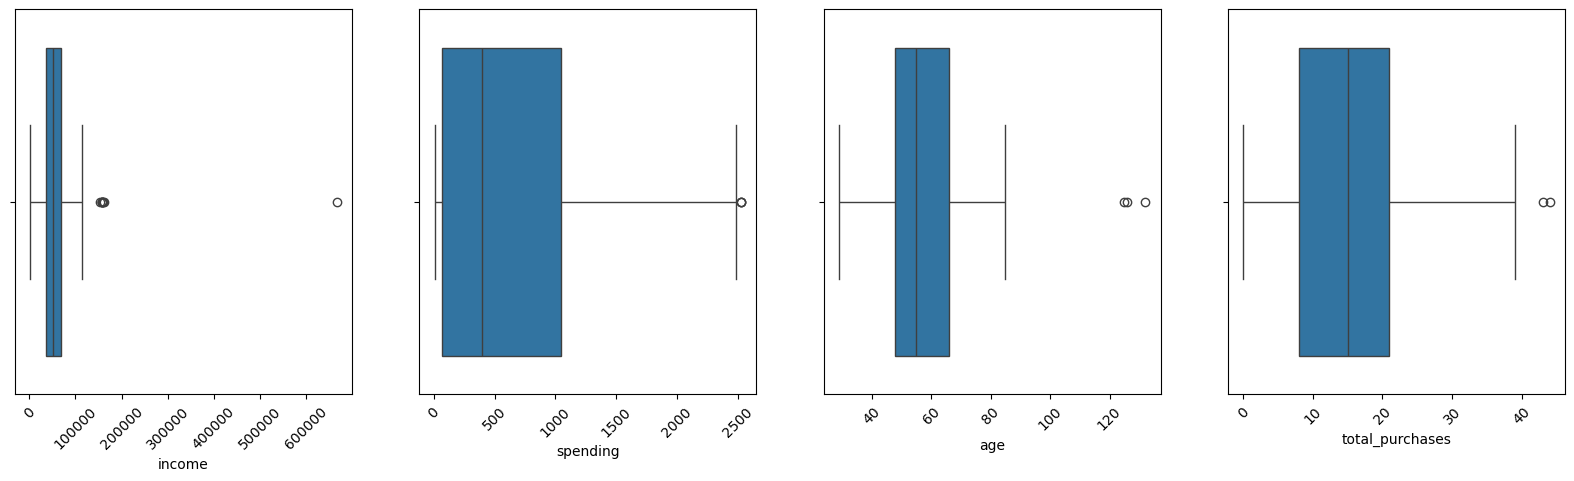

In [108]:
# Creating box plots and histogram
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
    sns.boxplot(x=data[v], ax = ax[i])
    ax[i].tick_params(rotation=45)
    i+=1
plt.show()

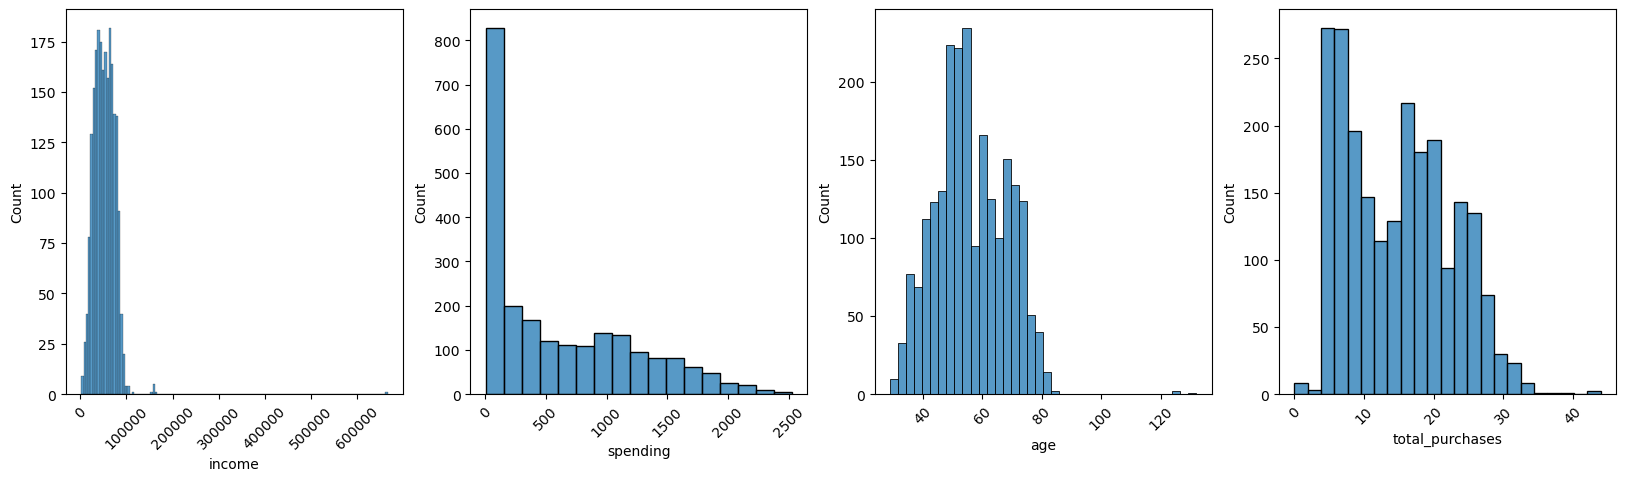

In [109]:
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
    sns.histplot(x=data[v], ax = ax[i])
    ax[i].tick_params(axis = 'x', rotation=45)
    i+=1
plt.show()

We can infer that  
- Spending is highly right skewed
- Income has extreme  outliers

In [110]:
# Cap the outliers to upper and lower limits
def outlier_detection(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    return ll, ul

In [111]:
for v in num_vars:
    print ("Var = ", v)
    ll,ul = outlier_detection(data[v])
    print(f'll = {ll}, ul = {ul}')
    data.loc[data[v]<ll, v] = ll
    data.loc[data[v]>ul, v] = ul

Var =  income
ll = -13587.75, ul = 117416.25
Var =  spending
ll = -1396.375, ul = 2510.625
Var =  age
ll = 21.0, ul = 93.0
Var =  total_purchases
ll = -11.5, ul = 40.5


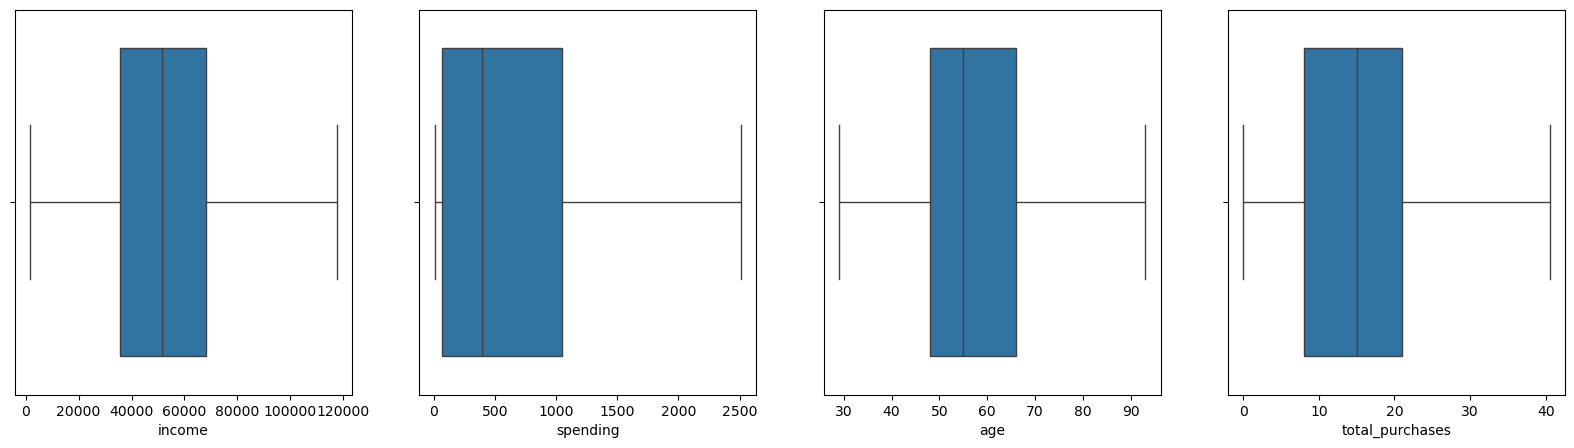

In [112]:
# Boxplots without outliers
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
    sns.boxplot(x=data[v], ax = ax[i])
    i+=1
plt.show()

In [113]:
# Using encoding for categorical variables
data.select_dtypes('object')

,education,marital_status,country
0,Graduation,alone,SP
1,Graduation,alone,CA
2,Graduation,couple,US
3,Graduation,couple,AUS
4,Graduation,alone,SP
...,...,...,...
2235,PhD,alone,US
2236,2n Cycle,couple,SP
2237,Graduation,alone,SP
2238,Graduation,couple,IND


In [114]:
# Ordinal encoder for education
data.education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [115]:
ord = OrdinalEncoder(categories = [['Basic','2n Cycle','Graduation', 'Master','PhD']])
data['education_encode'] = ord.fit_transform(data[['education']])
data['education_encode']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2235    4.0
2236    1.0
2237    2.0
2238    2.0
2239    4.0
Name: education_encode, Length: 2240, dtype: float64

In [116]:
# One hot encoding for marital_status and country
ohe = OneHotEncoder()
marital_status_encoded_data = ohe.fit_transform(data[['marital_status']]).toarray().astype(int)
marital_status_encoded_df = pd.DataFrame(marital_status_encoded_data,columns=ohe.categories_[0])
marital_status_encoded_df

,alone,couple
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
2235,1,0
2236,0,1
2237,1,0
2238,0,1


In [117]:
country_encoded_data = ohe.fit_transform(data[['country']]).toarray().astype(int)
country_encoded_df= pd.DataFrame(country_encoded_data, columns = ohe.categories_[0])
country_encoded_df

,AUS,CA,GER,IND,ME,SA,SP,US
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1
2236,0,0,0,0,0,0,1,0
2237,0,0,0,0,0,0,1,0
2238,0,0,0,1,0,0,0,0


In [118]:
#concatenating new dataframe to original dataframe
new_data = pd.concat([data, marital_status_encoded_df, country_encoded_df], axis = 1)
# OR new_data = pd.concat([data, pd.get_dummies(data[['marital_status','country']])], axis = 1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2240 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

In [119]:
# Correlation Heatmap
new_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'spending',
       'children_count', 'has_children', 'total_purchases', 'education_years',
       'education_encode', 'alone', 'couple', 'AUS', 'CA', 'GER', 'IND', 'ME',
       'SA', 'SP', 'US'],
      dtype='object')

In [120]:
var_cor =['income', 'age', 'children_count','recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth','spending','total_purchases']

In [121]:
cor_data = new_data[var_cor].corr()

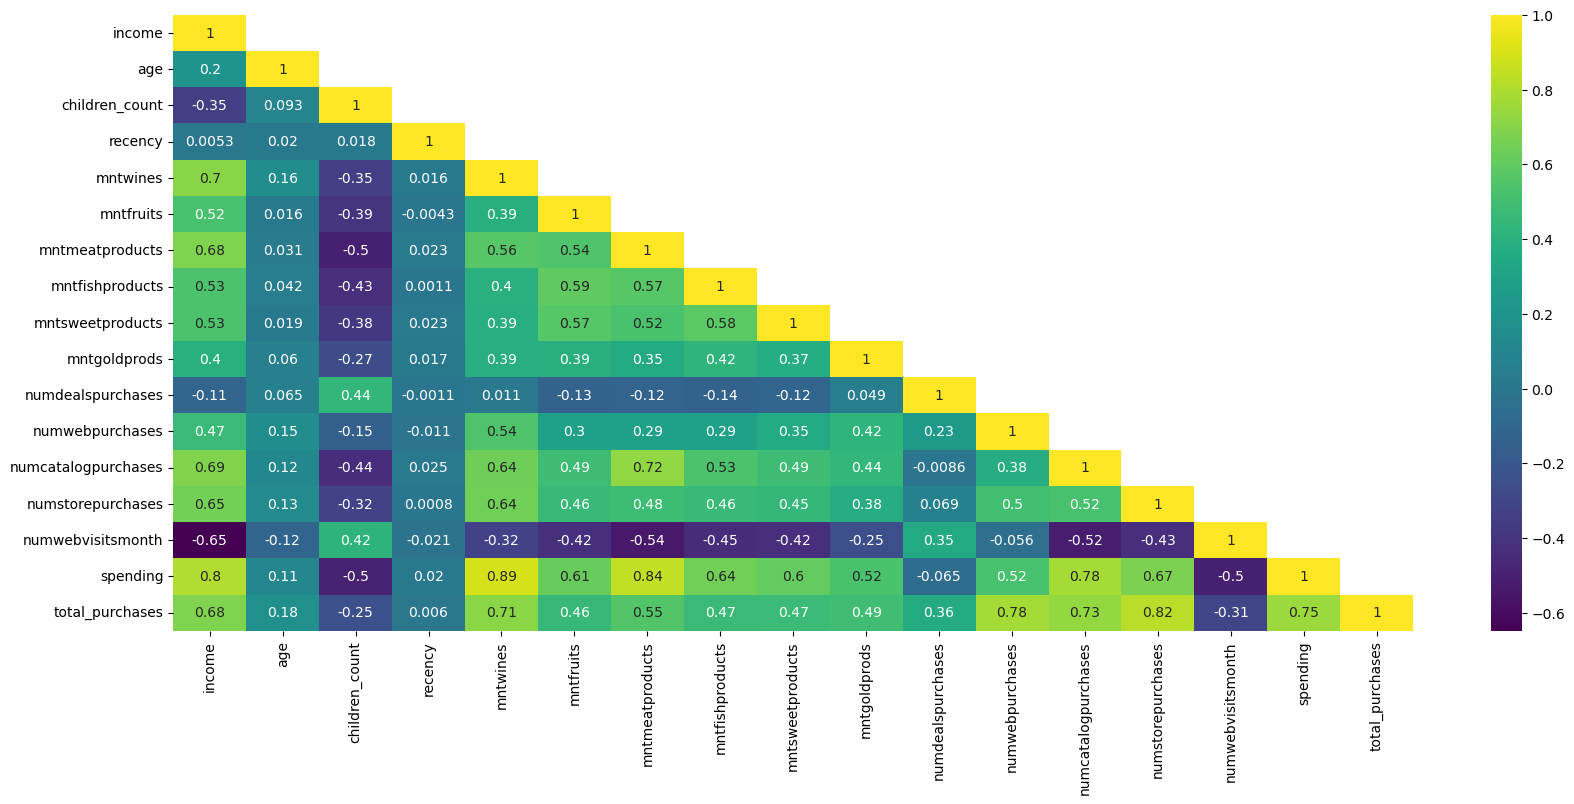

In [122]:
plt.figure(figsize = (20,8))
m = np.ones_like(cor_data) # All 1s in m
m[np.tril_indices_from(m)] = 0 # trim lower triangle of m with initial values = 0
sns.heatmap(cor_data, mask = m, annot = True, cmap = 'viridis') # colormap
plt.show()

## Test the following hypotheses:
a.	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

Claim - Older people are not as tech savvy and probably prefer shopping in store

H0: for old customers [no. of purchases in store <= no. of purchases online]

Ha: for old customers [no. of purchases in store > no. of purchases online]

In [123]:
store = new_data.loc[new_data.age >= 60, 'numstorepurchases']
web = new_data.loc[new_data.age >= 60, 'numwebpurchases']
stats.ttest_ind(store, web, alternative = 'greater')

TtestResult(statistic=12.739120193794443, pvalue=6.908596720806311e-36, df=1718.0)

### Since p value is much less than  alpha of 5% we shall reject the null hypothesis and conclude that older customers prefer store purchases.

b. Customers with children likely experience time constraints, making online shopping a more convenient option.

Claim - Customers with kids probably have less time to visit a store and would prefer to shop online

H0: For customers who have children [no. of purchases online <= no. of purchases in store]

Ha: For customers who have children [no. of purchases online > no. of purchases in store]

In [124]:
online = new_data.loc[new_data.has_children ==1, 'numwebpurchases']
store = new_data.loc[new_data.has_children ==1, 'numstorepurchases']
stats.ttest_ind(online, store, alternative = 'greater')

TtestResult(statistic=-11.85534380488127, pvalue=1.0, df=3202.0)

### Since p value = 1 is much greater than alpha of 5% we fail to reject the null hypothesis and conclude that people who have children prefer store purchases over online purchases.

c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

Claim - Other distribution channels may cannibalize sales at store

H0: Purchases at other channels <= No. of store purchases

Ha: Purchases at other channels > No. of store purchases

In [125]:
other = new_data.loc[:, ['numwebpurchases', 'numcatalogpurchases']].sum(axis = 1) # sum of two columns
store = new_data.loc[:, 'numstorepurchases']
stats.ttest_ind(other, store, alternative = 'greater')

TtestResult(statistic=7.884334964023309, pvalue=1.971324447658957e-15, df=4478.0)

### Since p value is much less than alpha of 5% we shall reject the null hypothesis and conclude that other distribution channels like web purchases or catalog purchases are preferred over store purchases.

d. Does the United States significantly outperform the rest of the world in total purchase volumes?

Claim - US fares significantly better than RoW in terms of total purchases

H0: total_purchases_US <= total_purchases_RoW

Ha: total_purchases_US > total_purchases_RoW

In [126]:
total_purchases_us = new_data.loc[new_data.country == 'US', 'total_purchases']
total_purchases_row = new_data.loc[new_data.country != 'US', 'total_purchases']
stats.ttest_ind(total_purchases_us, total_purchases_row, alternative = 'greater')

TtestResult(statistic=1.7339544907234352, pvalue=0.04153193317039351, df=2238.0)

### Since p value is less than alpha of 5% we shall reject the null hypothesis and conclude that US does better in terms of number of purchases against the rest of the world.

## Use appropriate visualization to help analyze the following:
a.	Identify the top-performing products and those with the lowest revenue.

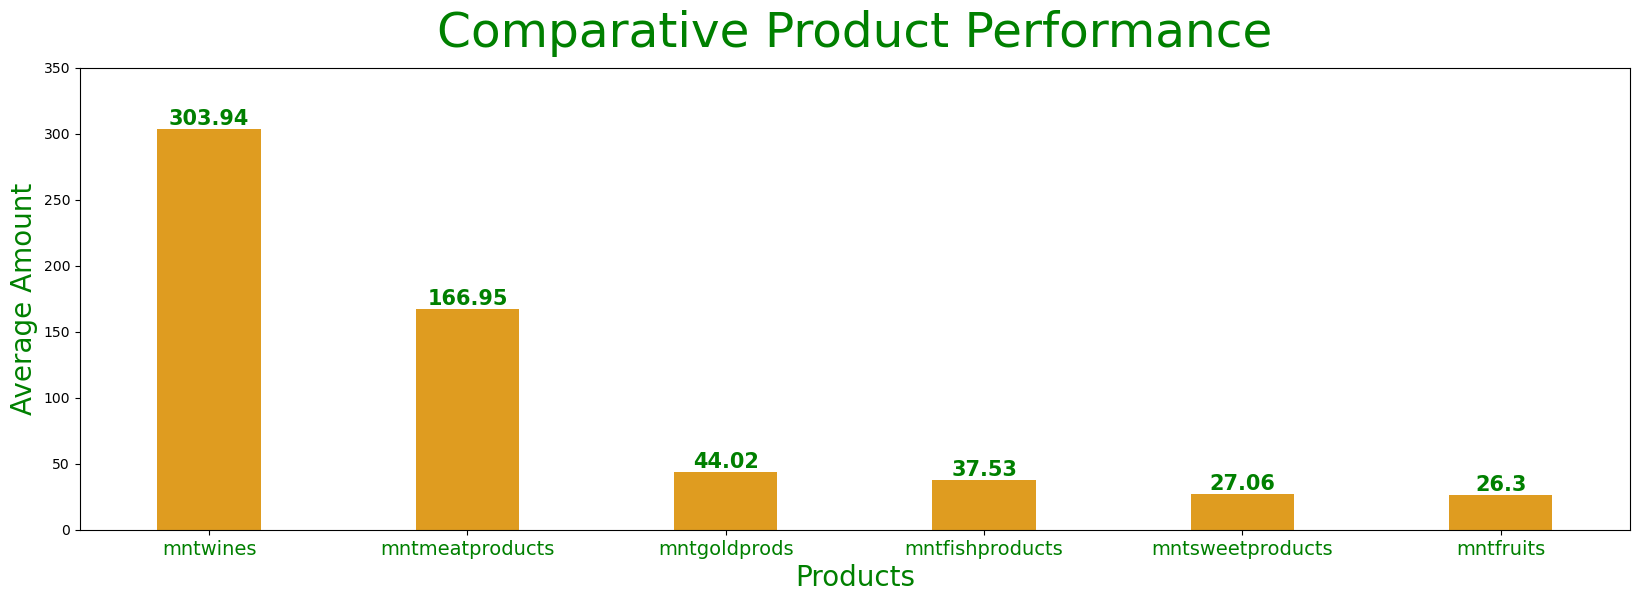

In [147]:
prod_data = new_data.loc[:, new_data.columns.str.startswith('mnt')].mean().round(2).sort_values(ascending = False)
plt.figure(figsize = (20,6))
sns.barplot(x = prod_data.index, y = prod_data.values, order = prod_data.index, color = 'orange', width = 0.4)
for i, v in enumerate(prod_data.values):
    plt.text(i, v , str(v), va='bottom', fontsize=15, color='green', ha='center', weight = 'heavy') 
plt.ylim(0, 350)
plt.xlabel('Products', size = 20, color = 'green')
plt.ylabel ('Average Amount', size = 20, color = 'green')
plt.title ('Comparative Product Performance', size = 35, pad = 15, color ='green') #padding is the distance between the title and the top of the axes
plt.xticks(size = 14, color = 'green')
plt.show()

### Wines is the top-performing product and fruits generates the lowest revenue.

b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

In [130]:
# create groups for age with histogram cuts
data['age_grp'] = pd.cut(data.age, bins = 5, labels = [1,2,3,4,5])
grpd_age = data.groupby('age_grp', observed = False)['age'].agg(['min','max'])
grpd_age['group'] = grpd_age['min'].astype(str) + '-' + grpd_age['max'].astype(str)
grpd_age

,min,max,group
age_grp,,,
1,29,41,29-41
2,42,54,42-54
3,55,67,55-67
4,68,80,68-80
5,81,93,81-93


In [134]:
data['age_grp'] = data['age_grp'].replace([1,2,3,4,5], grpd_age['group']) # renaming labels

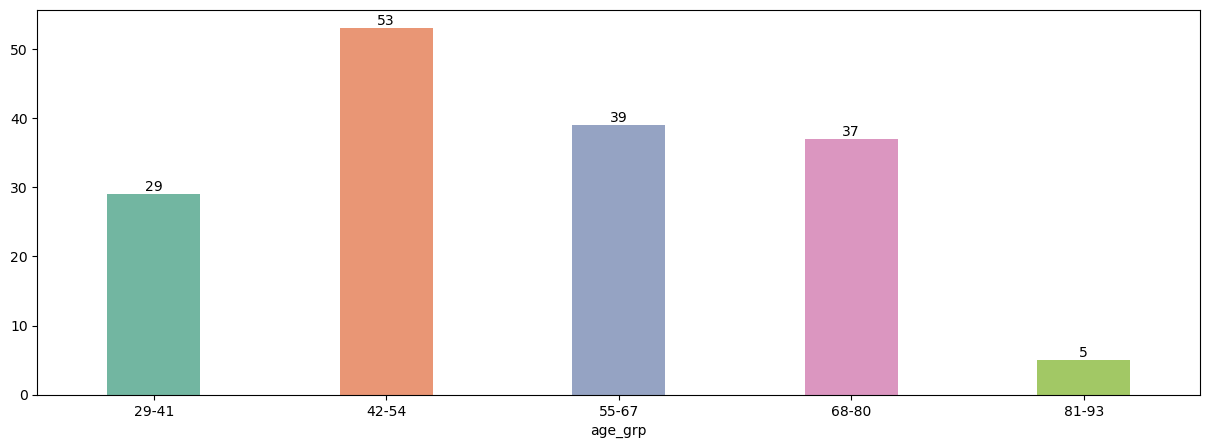

In [143]:
plot_data = data[data.acceptedcmp5==1].age_grp.value_counts().sort_index()
plt.figure(figsize = (15,5))
sns.barplot(x = plot_data.index, y = plot_data.values, order = plot_data.index, palette = 'Set2', width = 0.4)
for i, v in enumerate(plot_data.values):
    plt.text(i, v , str(v), va='bottom', ha='center') 
plt.show()

### Age group 42-54 mostly accepted the last campaign, 81-93 age group least accepted it.

c.	Determine the country with the highest number of customers who accepted the last campaign.

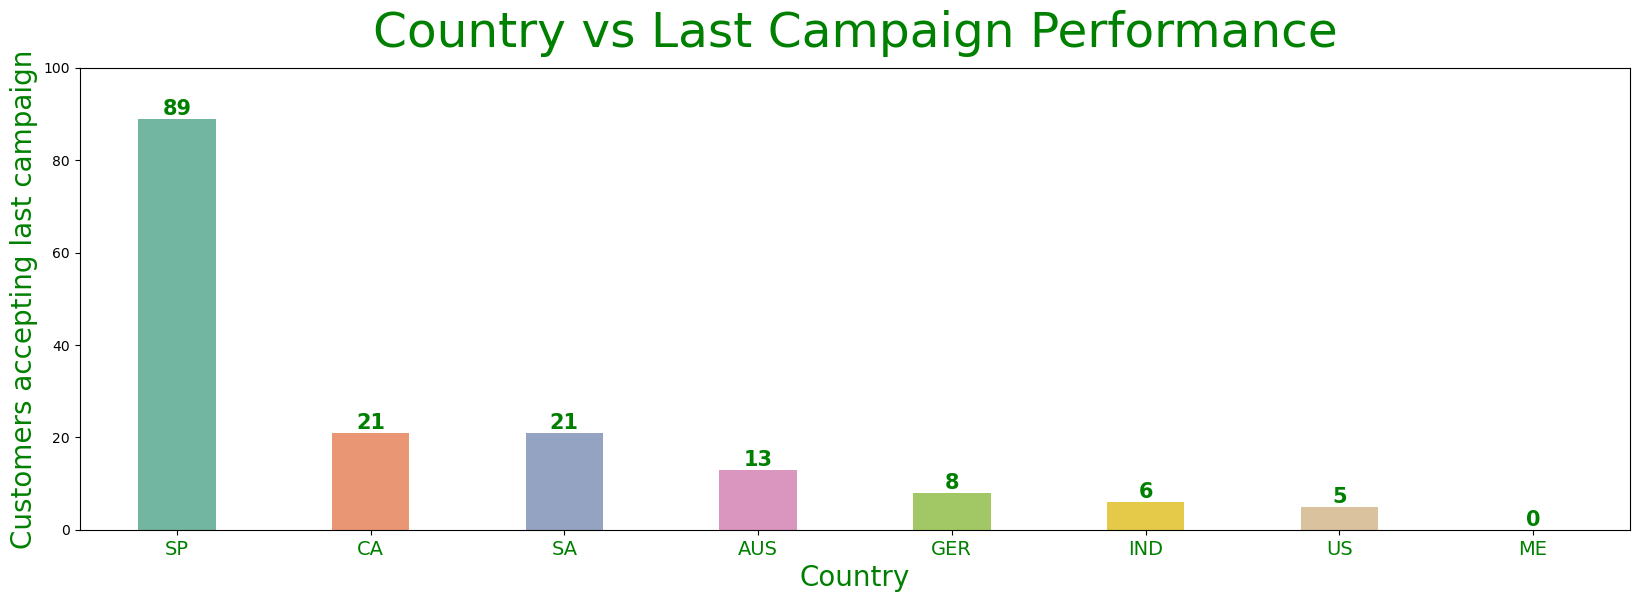

In [146]:
plot_data = new_data.groupby('country')[['acceptedcmp5']].agg('sum').squeeze().sort_values(ascending = False)
plt.figure(figsize = (20,6))
sns.barplot(x = plot_data.index, y = plot_data.values, order = plot_data.index, palette = 'Set2', width = 0.4)
for i, v in enumerate(plot_data.values):
    plt.text(i, v , str(v), va='bottom', fontsize=15, color='green', ha='center', weight = 'heavy') 
plt.ylim(0,100)
plt.xlabel('Country', size = 20, color = 'green')
plt.ylabel ('Customers accepting last campaign', size = 20, color = 'green')
plt.title ('Country vs Last Campaign Performance', size = 35, pad = 15, color ='green') 
plt.xticks(size = 14, color = 'green')
plt.show()

### Spain is the country with the highest number of customers who accepted the last campaign.

d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

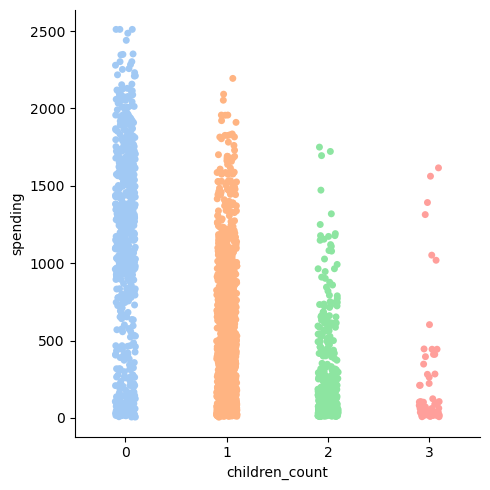

In [156]:
sns.catplot(x ='children_count', y = 'spending', data = new_data, kind = 'strip', palette = 'pastel')

### As count of children increases, spending goes down. So families are saving money for their children's future.

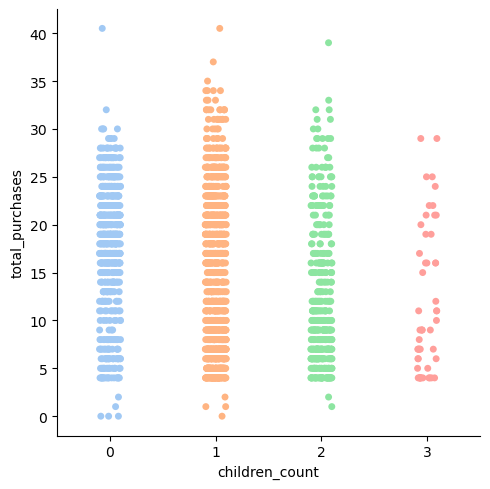

In [157]:
sns.catplot(x ='children_count', y = 'total_purchases', data = new_data, kind = 'strip', palette = 'pastel')

e.	Analyze the educational background of customers who lodged complaints in the last two years.

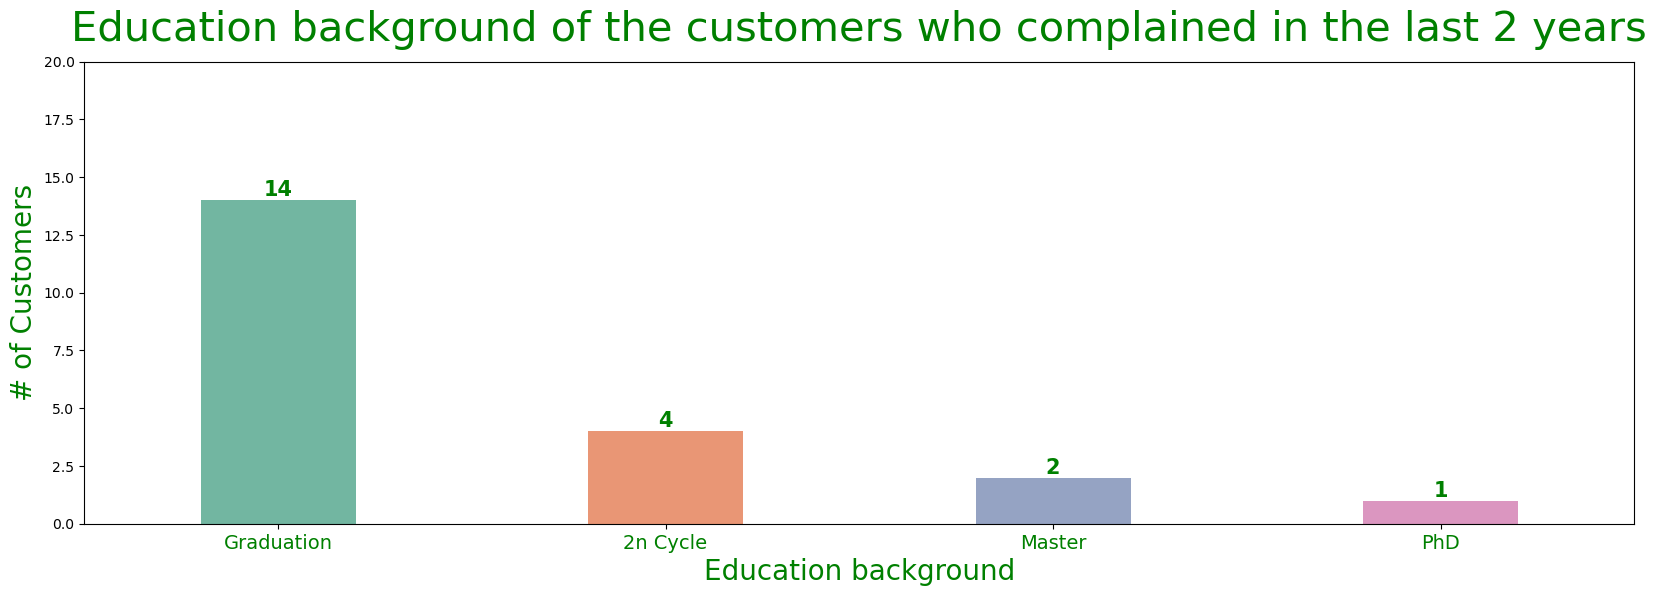

In [160]:
plot_data = new_data.loc[new_data.complain==1, 'education'].value_counts()
plt.figure(figsize = (20,6))
sns.barplot(x = plot_data.index, y = plot_data.values, order = plot_data.index, palette = 'Set2', width = 0.4)
for i, v in enumerate(plot_data.values):
    plt.text(i, v , str(v), va='bottom', fontsize=15, color='green', ha='center', weight = 'heavy') 
plt.ylim(0,20)
plt.xlabel('Education background', size = 20, color = 'green')
plt.ylabel ('# of Customers', size = 20, color = 'green')
plt.title ('Education background of the customers who complained in the last 2 years', size = 30, pad = 15, color ='green') 
plt.xticks(size = 14, color = 'green')
plt.show()

<Axes: xlabel='income', ylabel='spending'>

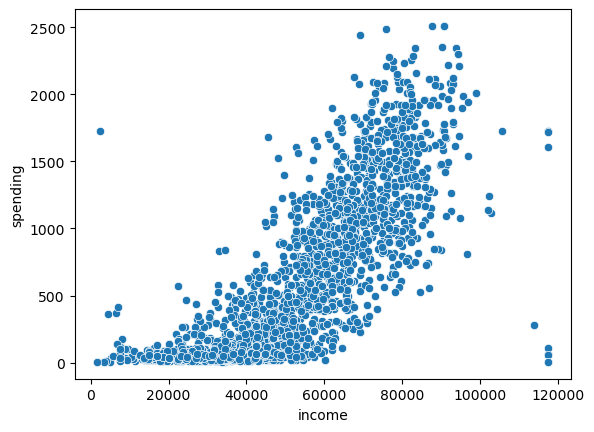

In [161]:
# Income plots
sns.scatterplot(x = 'income', y = 'spending', data = new_data)

<Axes: xlabel='income', ylabel='total_purchases'>

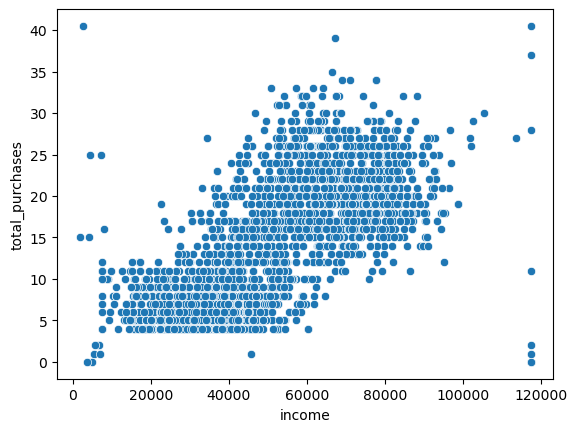

In [163]:
sns.scatterplot(x = 'income', y = 'total_purchases', data = new_data)

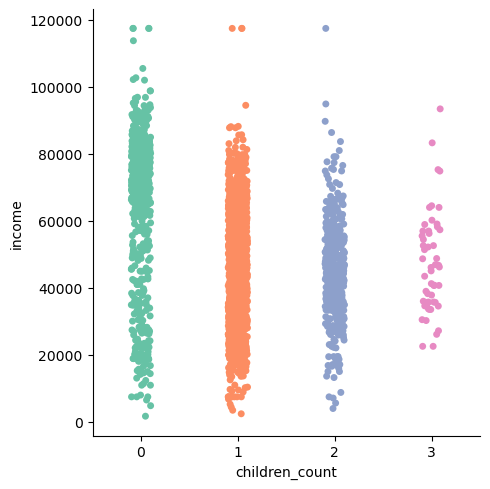

In [168]:
sns.catplot( y='income', x = 'children_count', data = new_data, kind = 'strip', palette = 'Set2')
plt.show()